In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import metrics

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [2]:
df = pd.read_csv('/home/gor/Downloads/spam_or_not_spam.zip', compression='zip')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [14]:
df.label.value_counts()

0    2500
1     500
Name: label, dtype: int64

In [3]:
label_data = df.label.value_counts()/df.shape[0]*100
label_data

0    83.333333
1    16.666667
Name: label, dtype: float64

Text(0, 0.5, 'Процентов от общего количества')

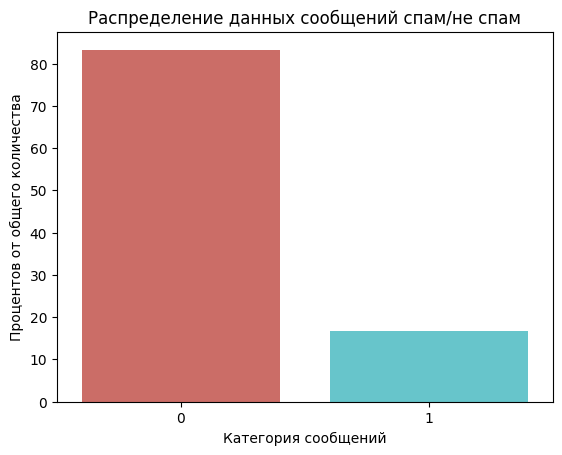

In [4]:
label_plot = sns.barplot(
    data=label_data.reset_index(), 
    x='index', 
    y='label',
    palette='hls'
)
label_plot.axes.set_title('Распределение данных сообщений спам/не спам', fontsize=12)
label_plot.set_xlabel('Категория сообщений')
label_plot.set_ylabel('Процентов от общего количества') 

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [20]:
df.email = df.email.apply(lambda x: np.Nan if not x else x)
df.email.isna().value_counts()

In [22]:
df.dropna(axis=0, inplace=True)

Переводим данные в векторный вид:

In [25]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [26]:
X.shape

(2999, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [37]:
y = df.label

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [39]:
y_test.mean()

0.164

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [42]:
clf_compl = naive_bayes.ComplementNB(alpha=0.01)
clf_compl.fit(X_train, y_train)
predicted_compl = clf_compl.predict(X_test)

print(f'Accuracy - {metrics.accuracy_score(y_test, predicted_compl)}')
print(f'Precision - {metrics.precision_score(y_test, predicted_compl)}')
print(f'Recall - {metrics.recall_score(y_test, predicted_compl)}')

Accuracy - 0.9946666666666667
Precision - 0.983739837398374
Recall - 0.983739837398374


In [43]:
clf_multi = naive_bayes.MultinomialNB(alpha=0.01)
clf_multi.fit(X_train, y_train)
predicted_multi = clf_multi.predict(X_test)

print(f'Accuracy - {metrics.accuracy_score(y_test, predicted_multi)}')
print(f'Precision - {metrics.precision_score(y_test, predicted_multi)}')
print(f'Recall - {metrics.recall_score(y_test, predicted_multi)}')

Accuracy - 0.996
Precision - 0.9918032786885246
Recall - 0.983739837398374


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

Нарисуйте ROC-кривую:

/home/gor/Documents/skillfactory_projects/DS/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


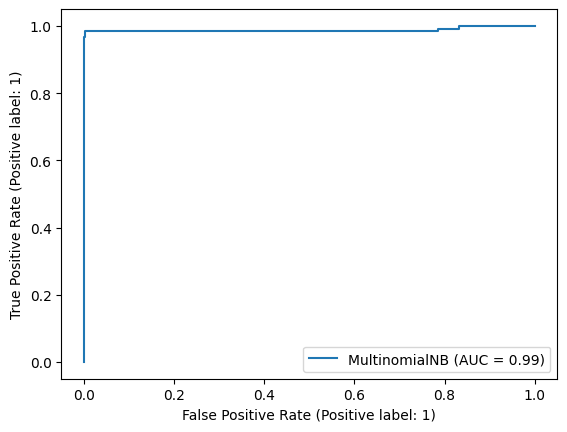

In [44]:
metrics.plot_roc_curve(clf_multi, X_test, y_test)
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [47]:
estim = naive_bayes.MultinomialNB()
clf = model_selection.GridSearchCV(estim, {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5]})
clf.fit(X_train, y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})